# Let's see if ChatGPT knows anything

In this notebook we will look at how well ChatGPT (January 2025 GPT-4 free Version 1.2024.332 (1733200494)) knows anything.



In [1]:
#Some boiler plate here to import the matplotlib.pyplot library for plotting below.
import matplotlib.pyplot as plt #import the pyplot library as plt
import matplotlib.style #Some style nonsense
import matplotlib as mpl #Some more style nonsense

#Set default figure size
#mpl.rcParams['figure.figsize'] = [12.0, 8.0] #Inches... of course it is inches
mpl.rcParams["legend.frameon"] = False
mpl.rcParams['figure.dpi']=150 # dots per inch

# First Chat

We asked ChatGPT *Can you write pure python code to generate a simple neural network?*

It replied
> Here’s an example of pure Python code to create and train a simple neural network from scratch. This implementation uses no external libraries like TensorFlow or PyTorch, focusing solely on Python’s standard library and NumPy for matrix operations.


In [2]:
import numpy as np

# Define activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Neural Network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))
    
    def forward(self, X):
        # Forward pass
        self.hidden_layer_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output = sigmoid(self.output_layer_input)
        return self.output

    def backward(self, X, y, learning_rate):
        # Compute the error
        output_error = y - self.output
        output_delta = output_error * sigmoid_derivative(self.output)
        
        # Error for hidden layer
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        hidden_delta = hidden_error * sigmoid_derivative(self.hidden_layer_output)
        
        # Update weights and biases
        self.weights_hidden_output += np.dot(self.hidden_layer_output.T, output_delta) * learning_rate
        self.bias_output += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += np.dot(X.T, hidden_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)
            if epoch % 100 == 0:
                loss = mean_squared_error(y, self.output)
                print(f"Epoch {epoch}, Loss: {loss}")

# Example usage
if __name__ == "__main__":
    # Training data (XOR problem)
    X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Initialize and train the neural network
    nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
    nn.train(X, y, epochs=10000, learning_rate=0.1)
    
    # Test the neural network
    print("Predictions:")
    print(nn.forward(X))

Epoch 0, Loss: 0.338080412142192
Epoch 100, Loss: 0.23220101247857106
Epoch 200, Loss: 0.22614866011328016
Epoch 300, Loss: 0.2195462885231378
Epoch 400, Loss: 0.21234867793981768
Epoch 500, Loss: 0.20460195795962877
Epoch 600, Loss: 0.19640963869695327
Epoch 700, Loss: 0.18788389773546213
Epoch 800, Loss: 0.1790971401853234
Epoch 900, Loss: 0.1700566202872863
Epoch 1000, Loss: 0.1607137026840968
Epoch 1100, Loss: 0.15100029155149958
Epoch 1200, Loss: 0.14087510328492342
Epoch 1300, Loss: 0.13036327792427174
Epoch 1400, Loss: 0.11957621753087555
Epoch 1500, Loss: 0.10870418815435434
Epoch 1600, Loss: 0.09798517616886815
Epoch 1700, Loss: 0.08766357113071888
Epoch 1800, Loss: 0.07795311947278277
Epoch 1900, Loss: 0.06901235711009782
Epoch 2000, Loss: 0.06093451718269048
Epoch 2100, Loss: 0.0537501750300583
Epoch 2200, Loss: 0.04743869446828787
Epoch 2300, Loss: 0.041943626505369425
Epoch 2400, Loss: 0.03718783798957098
Epoch 2500, Loss: 0.03308580580063569
Epoch 2600, Loss: 0.0295522294

## Testing the XOR network

Now we can try and test this over a wider range of input values.

(100, 100)


Text(0, 0.5, '$y$')

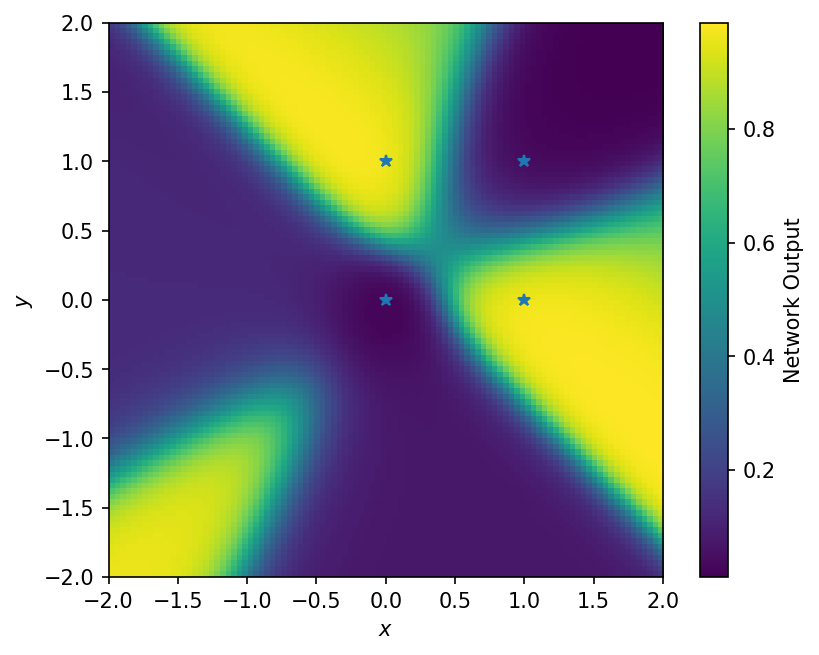

In [7]:
# Create a grid with 100 points along each axis, evenly spaced between -2 and 2
x = np.linspace(-2, 2, 100)  # 100 points from -2 to 2 on the x-axis
y = np.linspace(-2, 2, 100)  # 100 points from -2 to 2 on the y-axis

# Create a 2D grid using meshgrid
X, Y = np.meshgrid(x, y)
print(X.shape)

# Combine X and Y to create the full grid
grid = np.array([X.flatten(), Y.flatten()]).T

output=nn.forward(grid)

fig,ax =plt.subplots()
img=ax.imshow(output.reshape(100,100),origin='lower',extent=[-2,2,-2,2])
ax.plot([0,0,1,1],[0,1,0,1],"*")
color_bar=fig.colorbar(img)
color_bar.set_label('Network Output')
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

## That worked very well, why did it work so well?

Here the ChatGPT XOR network is doing a good job of mimicing the XOR function at least at the four [0,1] input points we trained the network on.

So how did it do it? Let's look at the numbers.

In [8]:
print("Hidden layer biases\n",nn.bias_hidden)
print("Hidden layer weights\n",nn.weights_input_hidden)
print("Output layer biases\n",nn.bias_output)
print("Output layer weights\n",nn.weights_hidden_output)

X=[[0,1]]
np.dot(X, nn.weights_input_hidden) #+ nn.bias_hidden


Hidden layer biases
 [[ 2.83696858  0.65264131  0.99373263 -1.84899933]]
Hidden layer weights
 [[-1.66801756  5.13904619 -2.78926683  5.63877782]
 [-2.27233269 -2.5224973   4.79722213  5.67643438]]
Output layer biases
 [[-0.78244525]]
Output layer weights
 [[ 4.24105461]
 [-5.98055727]
 [-5.38483926]
 [ 7.6224724 ]]


array([[-2.27233269, -2.5224973 ,  4.79722213,  5.67643438]])

### Looking at the two hidden nodes

At each hidden node the input to the sigmoid activation function is the sum of the bias plus the dot product of the weight and input.
$$h_i = b_i + w_{xi} * x + w_{yi}*y$$

So in this example the first time I ran the network we had:
$$ h_0 = 2.84 -1.67*x -2.27*y $$
$$ h_1 = 0.66 +5.13*x -2.52*y $$
$$ h_2 = 0.99 -2.79*x +4.80*y $$
$$ h_3 = -1.85 +5.64*x +5.68*y $$

Now all that matters is whether these values are greater or less than zero (as the activation function is the sigmoid). For each node there is a line where this happens. For $h_0$ this line is roughly defined as when $y < 1.25 - 0.75x$ whilst for $h_1$ it is when $y <0.26 + 2.04x$ and so on.

The output is then calculated as the sigmoid $f(z)$ applied to:
$$ z = -0.78 + 4.24*f(h_0) - 5.98*f(h_1) - 5.38*f(h_2) + 7.62*f(h_3)$$





-1.6680175566024096
-2.272332689942265


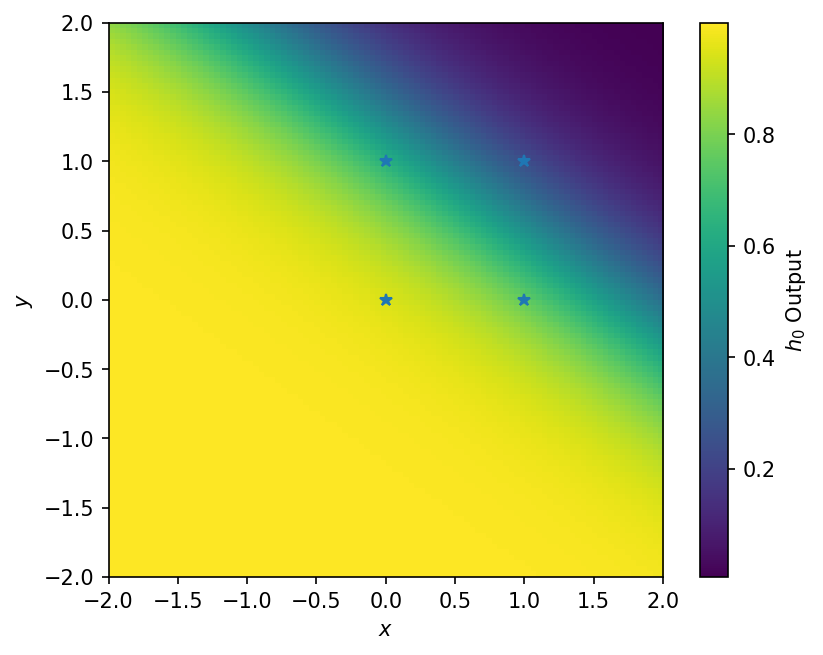

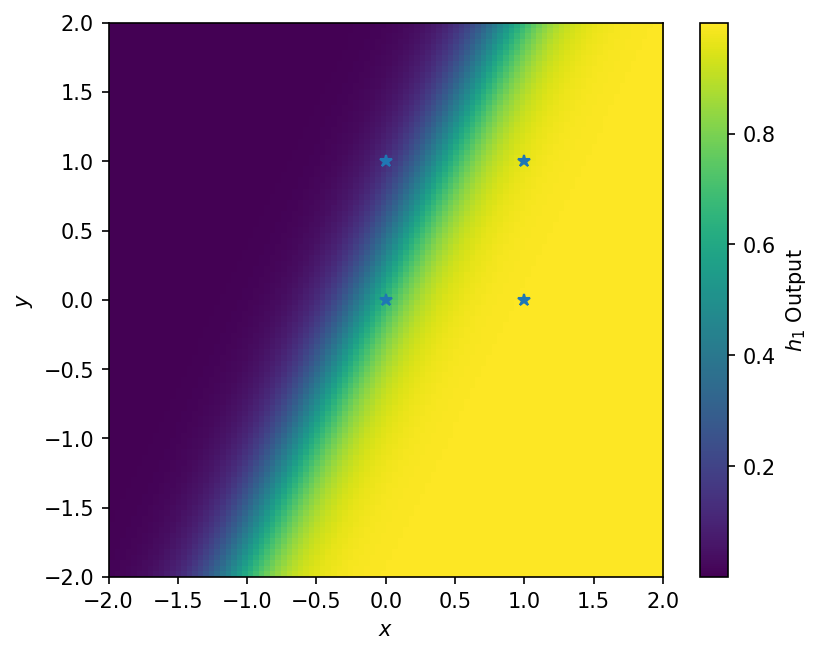

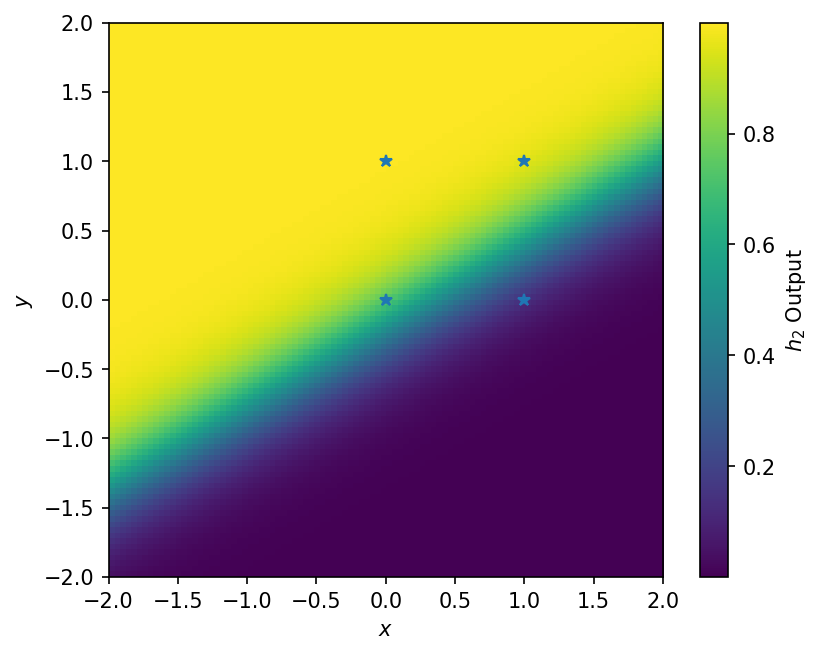

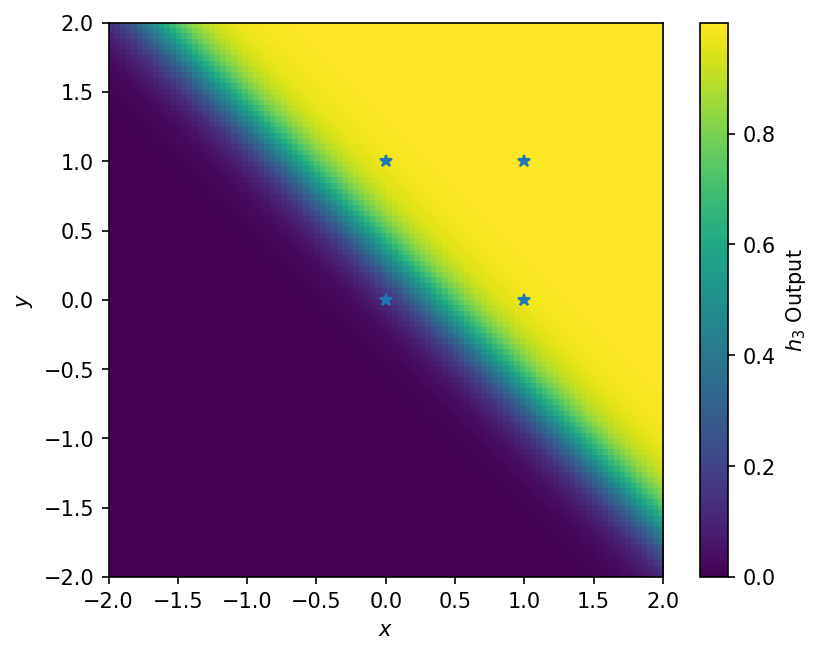

In [20]:

print(nn.weights_input_hidden[0][0])
print(nn.weights_input_hidden[1][0])

h0_input=nn.bias_hidden[0][0]+nn.weights_input_hidden[0][0]*grid[:,0]+nn.weights_input_hidden[1][0]*grid[:,1]
h0_output=sigmoid(h0_input)

h1_input=nn.bias_hidden[0][1]+nn.weights_input_hidden[0][1]*grid[:,0]+nn.weights_input_hidden[1][1]*grid[:,1]
h1_output=sigmoid(h1_input)

h2_input=nn.bias_hidden[0][2]+nn.weights_input_hidden[0][2]*grid[:,0]+nn.weights_input_hidden[1][2]*grid[:,1]
h2_output=sigmoid(h2_input)

h3_input=nn.bias_hidden[0][3]+nn.weights_input_hidden[0][3]*grid[:,0]+nn.weights_input_hidden[1][3]*grid[:,1]
h3_output=sigmoid(h3_input)


def plotGrid(image,label="Something"):
    fig,ax =plt.subplots()
    img=ax.imshow(image,origin='lower',extent=[-2,2,-2,2])
    ax.plot([0,0,1,1],[0,1,0,1],"*")
    color_bar=fig.colorbar(img)
    color_bar.set_label(label)
    ax.set_xlabel(r'$x$')
    ax.set_ylabel(r'$y$')

#plotGrid(h0_input.reshape(100,100),r'$h_0$ Input')
plotGrid(h0_output.reshape(100,100),r'$h_0$ Output')
#plotGrid(h1_input.reshape(100,100),r'$h_1$ Input')
plotGrid(h1_output.reshape(100,100),r'$h_1$ Output')
plotGrid(h2_output.reshape(100,100),r'$h_2$ Output')
plotGrid(h3_output.reshape(100,100),r'$h_3$ Output')



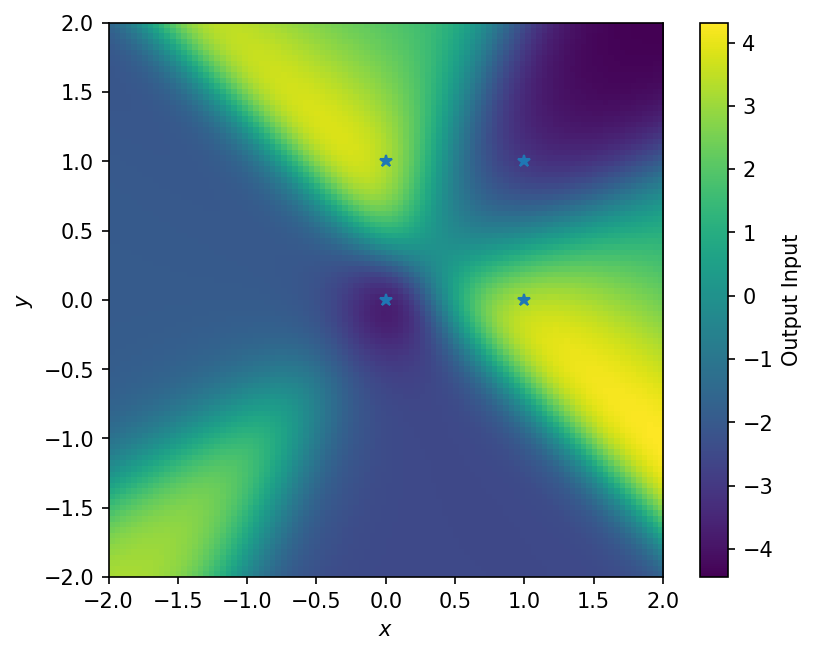

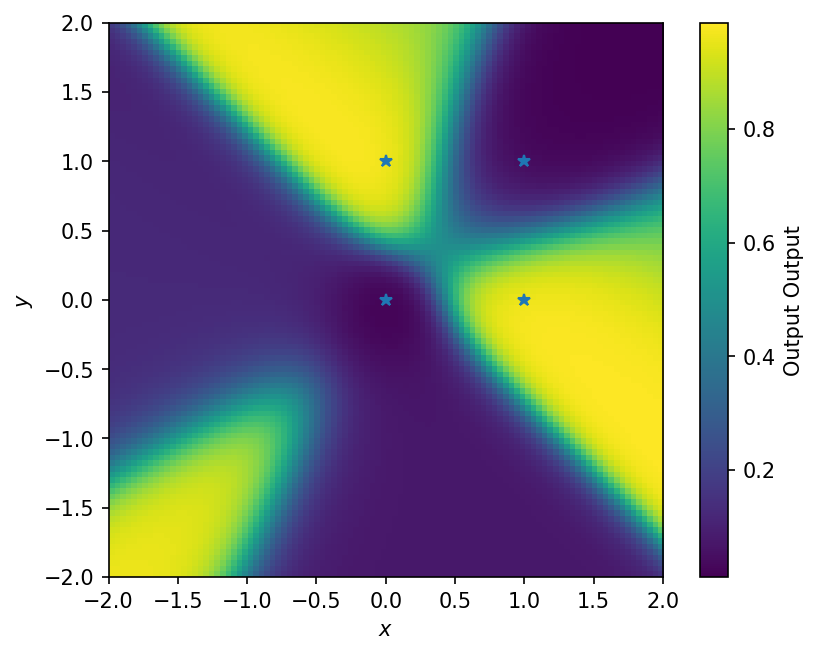

In [21]:

output_input=nn.bias_output[0][0]+nn.weights_hidden_output[0][0]*h0_output+nn.weights_hidden_output[1][0]*h1_output+nn.weights_hidden_output[2][0]*h2_output+nn.weights_hidden_output[3][0]*h3_output
output_output=sigmoid(output_input)
plotGrid(output_input.reshape(100,100),r'Output Input')
plotGrid(output_output.reshape(100,100),r'Output Output')

